In [1]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical

# Reading data

In [2]:
df = pd.read_csv('ionosphere_data.csv')

In [3]:
display(df)


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# checking values if null or empty

In [4]:
 np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
np.where(df.empty)

(array([], dtype=int64),)

# Turning unique labels into values

In [6]:
df['label'].unique()
df["label"] = df["label"].factorize()[0]
display (df["label"] )

0      0
1      1
2      0
3      1
4      0
      ..
346    0
347    0
348    0
349    0
350    0
Name: label, Length: 351, dtype: int64

# shuffling

In [7]:
np.random.seed(100)
shuf=np.random.randint(0,len(df),len(df)) 
display(shuf.max())
df=df.iloc[shuf]
display(df)

350

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,0
280,1,0,0.99701,0.21677,0.91966,0.47030,0.76902,0.62415,0.53312,0.78120,...,0.15908,-0.66651,0.02277,-0.64872,-0.13462,-0.54615,-0.22949,-0.47201,-0.35032,0
323,1,0,0.39394,-0.24242,0.62655,0.01270,0.45455,0.09091,0.63636,0.09091,...,0.05929,0.46362,0.06142,0.33333,-0.03030,0.41856,0.06410,0.39394,0.24242,0
343,1,0,0.35346,-0.13768,0.69387,-0.02423,0.68195,-0.03574,0.55717,-0.06119,...,-0.00564,0.39146,-0.09038,0.35588,-0.10306,0.32232,-0.08637,0.28943,-0.08300,0
79,0,0,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,1,0,0.88110,0.00000,0.94817,-0.02744,0.93598,-0.01220,0.90244,0.01829,...,0.04878,0.89666,0.02226,0.90854,0.00915,1.00000,0.05488,0.97561,-0.01220,0
237,1,0,0.57540,-0.03175,0.75198,-0.05357,0.61508,-0.01190,0.53968,0.03373,...,0.03968,0.61291,-0.01237,0.61706,-0.13492,0.68849,-0.01389,0.62500,-0.03175,0
292,1,0,0.84713,-0.03397,0.86412,-0.08493,0.81953,0.00000,0.73673,-0.07643,...,-0.26115,0.74115,-0.23312,0.66242,-0.22293,0.72611,-0.37792,0.65817,-0.24841,0
179,1,0,1.00000,-0.08183,1.00000,-0.11326,0.99246,-0.29802,1.00000,-0.33075,...,-0.96296,0.48757,-0.85669,0.37941,-0.83893,0.24117,-0.88846,0.29221,-0.89621,0


# Splitting data

In [8]:
train_data=df[0:210]
train_targets=train_data.iloc[0:210,[34]]
train_data=train_data.drop(["label"],axis=1)
train_data=train_data.drop(["feature2"],axis=1)
train_data.astype('float64')
one_hot_train_labels = to_categorical(train_targets)
display(one_hot_train_labels.shape)

(210, 2)

In [9]:
test_data=df[210:352]
test_targets=test_data.iloc[0:142,[34]]
test_data=test_data.drop(["label"],axis=1)
test_data=test_data.drop(["feature2"],axis=1)
test_data.astype('float64')
one_hot_test_labels = to_categorical(test_targets)
display(test_targets)

,label
131,0
139,0
305,0
285,0
292,0
...,...
329,0
237,0
292,0
179,0


# Normalizing data

In [10]:
train_mean = train_data.mean(axis=0) 
train_data -= train_mean
train_std = train_data.std(axis=0)
train_data /= train_std
test_data -= train_mean
test_data /= train_std


# converting data type

In [11]:
display(train_data.dtypes)

feature1     float64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
dtype: object

# model initialization

In [24]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# model training

In [26]:
history=model.fit(train_data, train_targets, epochs=350,validation_split = 0.3,verbose=0)

# model validation and accuracy

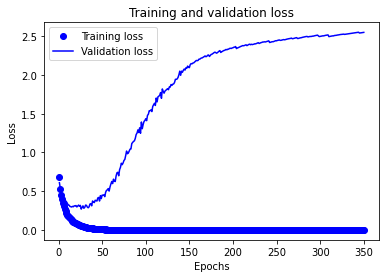

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,350 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

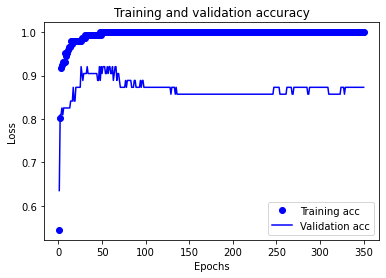

In [28]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model evaluation

In [45]:
model.fit(train_data, train_targets, epochs=10,validation_split = 0.3,verbose=0)

In [46]:
loss, accuracy = model.evaluate(test_data, test_targets)

5/5 [==============================] - 0s 5ms/step - loss: 3.8817 - accuracy: 0.8511


In [50]:
c=np.array(test_data.iloc[30])
a=c.reshape(1,33)
display(a)

array([[-2.49231989,  0.76008454,  2.13515906,  0.76975496, -2.28862043,
         0.88656119,  1.63999542,  1.00968049,  1.78662121,  1.0017937 ,
         1.80829359,  0.93838868, -2.09580819,  1.06849178,  2.18162909,
         1.06851805, -1.93958145,  1.1194027 , -2.05145834,  1.14991996,
         1.98573718,  1.06751836,  1.87435171,  1.15287148, -1.90964629,
         0.91870155,  1.97428157,  1.15960532,  2.02713567,  1.22318112,
         1.91324009,  1.31425538,  2.14825733]])

In [51]:
test_targets.iloc[30]

label    1
Name: 214, dtype: int64

In [52]:
model.predict(a)

array([[1.]], dtype=float32)